In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import *
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [2]:
df = pd.read_csv('drug_consumption3.csv')

In [3]:
df.head()

,ID,AgeGroup,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive_Fraction,SS_Fraction,Alcohol,Caffeine,Cannabis,Cocaine
0,1,35 - 44,Female,Professional certificate/ diploma,UK,Mixed-White/Asian,39.0,36.0,42,37,42,18.83,7.00,Used,Used,Never Used,Never Used
1,2,25 - 34,Male,Doctorate degree,UK,White,29.0,52.0,55,48,41,16.29,11.83,Used,Used,Used,Used
2,3,35 - 44,Male,Professional certificate/ diploma,UK,White,31.0,45.0,40,32,34,14.64,13.21,Used,Used,Used,Never Used
3,4,18 - 24,Female,Masters degree,UK,White,34.0,34.0,46,47,46,14.64,7.00,Used,Used,Used,Used
4,5,35 - 44,Female,Doctorate degree,UK,White,43.0,28.0,43,41,50,18.83,11.83,Used,Used,Used,Never Used


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1978 entries, 0 to 1977
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  1978 non-null   int64  
 1   AgeGroup            1952 non-null   object 
 2   Gender              1978 non-null   object 
 3   Education           1978 non-null   object 
 4   Country             1978 non-null   object 
 5   Ethnicity           1978 non-null   object 
 6   Nscore              1958 non-null   float64
 7   Escore              1957 non-null   float64
 8   Oscore              1978 non-null   int64  
 9   Ascore              1978 non-null   int64  
 10  Cscore              1978 non-null   int64  
 11  Impulsive_Fraction  1978 non-null   float64
 12  SS_Fraction         1978 non-null   float64
 13  Alcohol             1978 non-null   object 
 14  Caffeine            1978 non-null   object 
 15  Cannabis            1978 non-null   object 
 16  Cocain

In [5]:
df.columns

Index(['ID', 'AgeGroup', 'Gender', 'Education', 'Country', 'Ethnicity',
       'Nscore', 'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive_Fraction',
       'SS_Fraction', 'Alcohol', 'Caffeine', 'Cannabis', 'Cocaine'],
      dtype='object')

In [6]:
df = df.drop(columns=['ID'])

In [7]:
df.isnull().sum()

AgeGroup              26
Gender                 0
Education              0
Country                0
Ethnicity              0
Nscore                20
Escore                21
Oscore                 0
Ascore                 0
Cscore                 0
Impulsive_Fraction     0
SS_Fraction            0
Alcohol                0
Caffeine               0
Cannabis               0
Cocaine                0
dtype: int64

#### calculatin no. of missing values for each column and it's percentage

In [8]:
def percentage_of_miss():
  data1=df[df.columns[df.isnull().sum()>=1]] #contain columns that have at least one missing values
  total_miss = data1.isnull().sum().sort_values(ascending=False)
  percent_miss = (data1.isnull().sum()/df.shape[0]).sort_values(ascending=False)
  missing_data = pd.concat([total_miss, percent_miss], axis=1, keys=['Number of Missing', 'Percentage'])
  return(missing_data)

In [9]:
missing_data=percentage_of_miss()
missing_data 

,Number of Missing,Percentage
AgeGroup,26,0.013145
Escore,21,0.010617
Nscore,20,0.010111


Visualize the missing data

In [10]:
df = df.dropna(subset=['Nscore', 'AgeGroup','Escore'])

In [11]:
df.shape

(1943, 16)

Text(0.5, 1.0, 'Count plot of Cannabis')

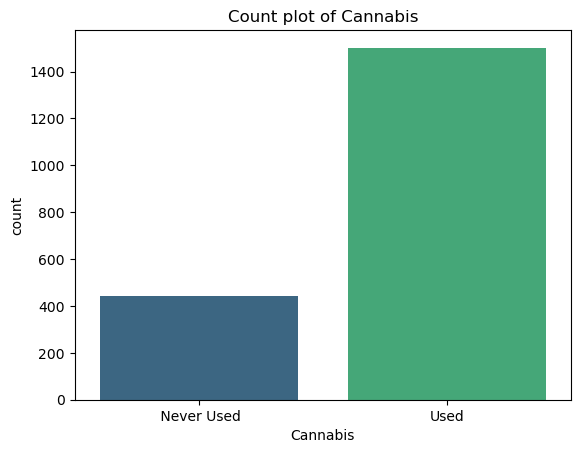

In [12]:
sns.countplot(x=df['Cannabis'], data=df, palette='viridis')
plt.title('Count plot of Cannabis')

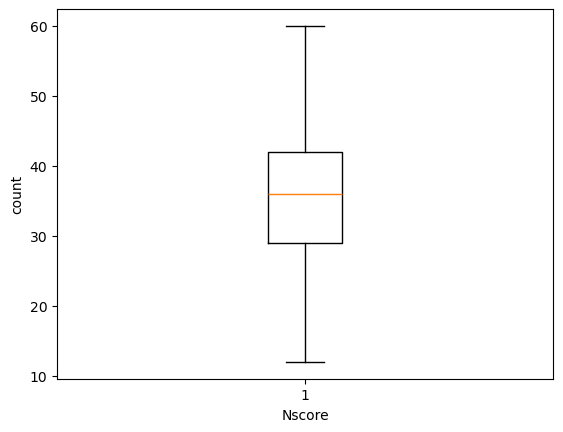

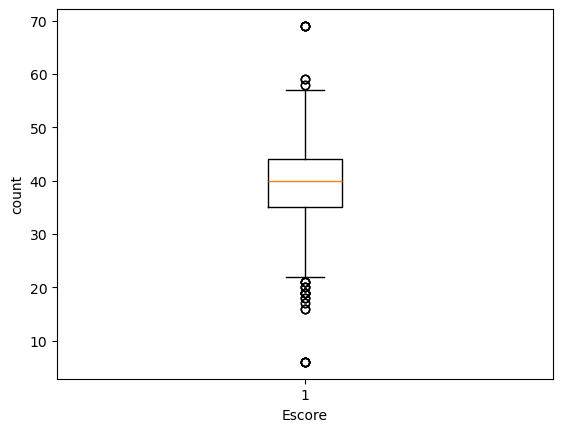

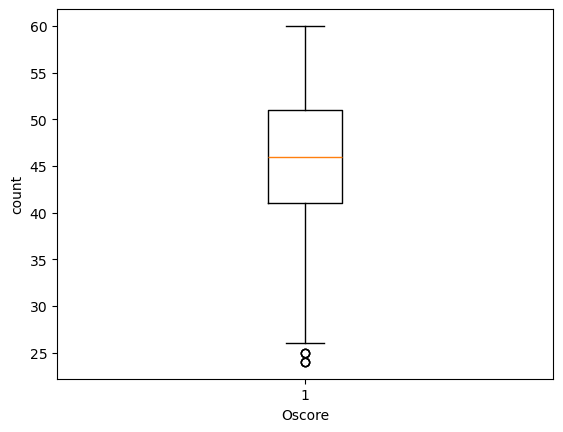

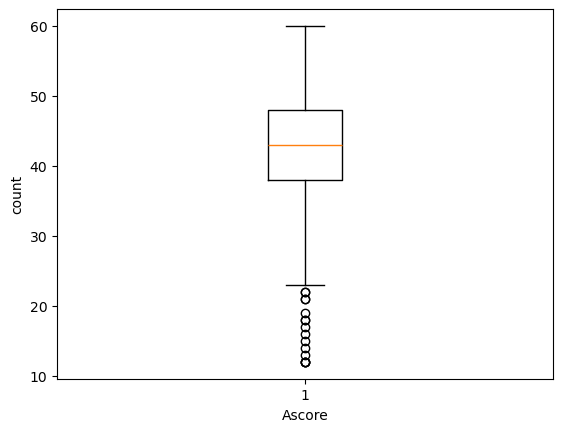

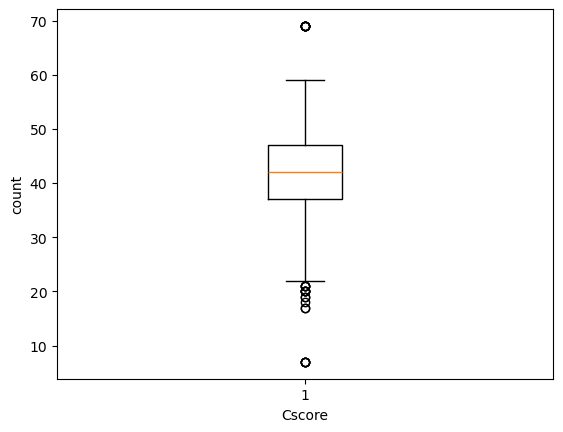

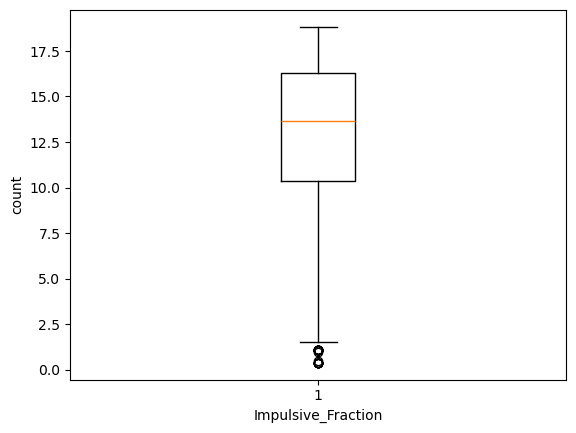

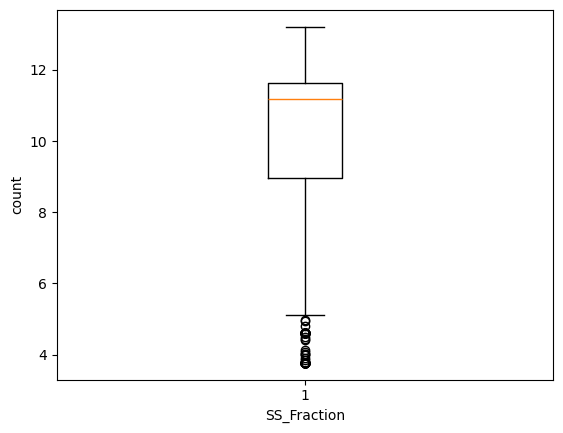

In [13]:
for col_name in df:
    if(df[col_name].dtypes=='int64' or df[col_name].dtypes=='float64'):
        plt.boxplot(df[col_name])
        plt.xlabel(col_name)
        plt.ylabel('count')
        plt.show()

In [14]:
Q1 = df.Cscore.quantile(0.25)
Q3 = df.Cscore.quantile(0.75)
IQR = Q3 - Q1
df = df[(df.Cscore >= Q1 - 1.5*IQR) & (df.Cscore <= Q3 + 1.5*IQR)]

Q1 = df.Escore.quantile(0.25)
Q3 = df.Escore.quantile(0.75)
IQR = Q3 - Q1
df = df[(df.Escore >= Q1 - 1.5*IQR) & (df.Escore <= Q3 + 1.5*IQR)]

Q1 = df.Ascore.quantile(0.25)
Q3 = df.Ascore.quantile(0.75)
IQR = Q3 - Q1
df = df[(df.Ascore >= Q1 - 1.5*IQR) & (df.Ascore <= Q3 + 1.5*IQR)]

Q1 = df.SS_Fraction.quantile(0.25)
Q3 = df.SS_Fraction.quantile(0.75)
IQR = Q3 - Q1
df = df[(df.SS_Fraction >= Q1 - 1.5*IQR) & (df.SS_Fraction <= Q3 + 1.5*IQR)]

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1716 entries, 0 to 1942
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   AgeGroup            1716 non-null   object 
 1   Gender              1716 non-null   object 
 2   Education           1716 non-null   object 
 3   Country             1716 non-null   object 
 4   Ethnicity           1716 non-null   object 
 5   Nscore              1716 non-null   float64
 6   Escore              1716 non-null   float64
 7   Oscore              1716 non-null   int64  
 8   Ascore              1716 non-null   int64  
 9   Cscore              1716 non-null   int64  
 10  Impulsive_Fraction  1716 non-null   float64
 11  SS_Fraction         1716 non-null   float64
 12  Alcohol             1716 non-null   object 
 13  Caffeine            1716 non-null   object 
 14  Cannabis            1716 non-null   object 
 15  Cocaine             1716 non-null   object 
dtypes: flo

In [16]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [17]:
for column in df.select_dtypes(include=['object']).columns:
    df[column] = le.fit_transform(df[column])

In [18]:
df.head()

,AgeGroup,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive_Fraction,SS_Fraction,Alcohol,Caffeine,Cannabis,Cocaine
0,2,0,6,5,3,39.0,36.0,42,37,42,18.83,7.00,1,1,0,0
1,1,1,0,5,6,29.0,52.0,55,48,41,16.29,11.83,1,1,1,1
2,2,1,6,5,6,31.0,45.0,40,32,34,14.64,13.21,1,1,1,0
3,0,0,5,5,6,34.0,34.0,46,47,46,14.64,7.00,1,1,1,1
4,2,0,0,5,6,43.0,28.0,43,41,50,18.83,11.83,1,1,1,0


In [19]:
df.columns

Index(['AgeGroup', 'Gender', 'Education', 'Country', 'Ethnicity', 'Nscore',
       'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive_Fraction',
       'SS_Fraction', 'Alcohol', 'Caffeine', 'Cannabis', 'Cocaine'],
      dtype='object')

### Feature Selection

In [20]:
X=df[['AgeGroup', 'Gender', 'Education', 'Country', 'Ethnicity', 'Nscore',
       'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive_Fraction',
       'SS_Fraction', 'Alcohol', 'Caffeine', 'Cocaine']]
y=df['Cannabis']

In [21]:
# separate dataset into train and test

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2, random_state=42)

In [24]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [25]:
feature_importances = rf_model.feature_importances_

In [26]:
feature_names = X.columns

In [27]:
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

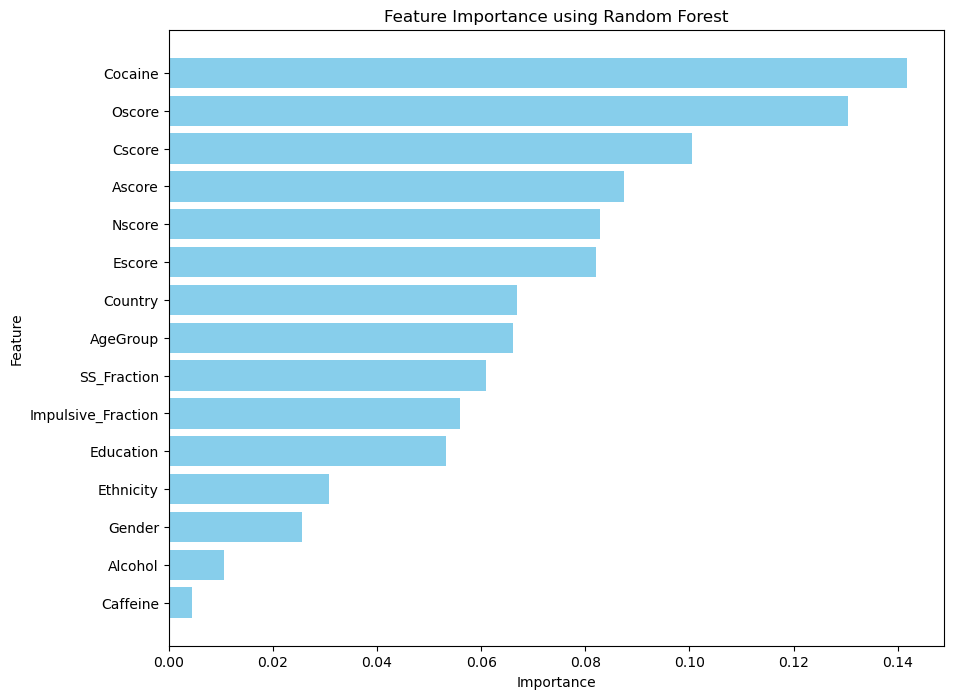

In [28]:
plt.figure(figsize=(10, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance using Random Forest')
plt.gca().invert_yaxis()
plt.show()

In [29]:
X=df[['Cocaine','Nscore','Escore', 'Oscore', 'Ascore', 'Cscore','AgeGroup', 'Country','Impulsive_Fraction',
       'SS_Fraction']]
y=df['Cannabis']

In [30]:
from sklearn.preprocessing import LabelEncoder, StandardScaler 
from sklearn.compose import ColumnTransformer

In [31]:
cat_features = X.select_dtypes(include="object").columns
num_features = X.select_dtypes(exclude="object").columns

numeric_transformer = StandardScaler()
le_transformer = LabelEncoder()

preprocessor = ColumnTransformer(
    [
        ("LabelEncoder", le_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),        
    ]
)

In [32]:
X = preprocessor.fit_transform(X)

In [33]:
X.shape

(1716, 10)

In [34]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2, random_state=0)

In [35]:
X_train.shape, X_test.shape

((1372, 10), (344, 10))

### Create an Evaluate Function to give all metrics after model Training

In [36]:
def evaluate_model(true, predicted):
    accuracy = accuracy_score(true, predicted)
    return accuracy

In [37]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Support Vector Classifier": SVC(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGB": XGBClassifier()
}

model_list = []
accuracy_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)

    
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    
    model_train_accuracy = round(evaluate_model(y_train, y_train_pred),2)

    model_test_accuracy  = round(evaluate_model(y_test, y_test_pred),2)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))


    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Accuracy: {:.4f}".format(model_test_accuracy))
   
    accuracy_list.append(model_test_accuracy)
    
    print('='*35)
    print('\n')

Logistic Regression
Model performance for Training set
- Accuracy: 0.8400
----------------------------------
Model performance for Test set
- Accuracy: 0.8500


Support Vector Classifier
Model performance for Training set
- Accuracy: 0.8600
----------------------------------
Model performance for Test set
- Accuracy: 0.8300


K-Nearest Neighbors
Model performance for Training set
- Accuracy: 0.8800
----------------------------------
Model performance for Test set
- Accuracy: 0.8200


Decision Tree
Model performance for Training set
- Accuracy: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.7800


Random Forest
Model performance for Training set
- Accuracy: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.8300


XGB
Model performance for Training set
- Accuracy: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.8200




### Results

In [52]:
pd.DataFrame(list(zip(model_list, accuracy_list)), 
             columns=['Model Name', 'Accuracy']).sort_values(by=["Accuracy"],ascending=False)

,Model Name,Accuracy
0,Logistic Regression,0.85
1,Support Vector Classifier,0.83
4,Random Forest,0.83
2,K-Nearest Neighbors,0.82
5,XGB,0.82
3,Decision Tree,0.78


### Hyperparameter tuning - Logistic Regression

In [39]:
from sklearn.model_selection import GridSearchCV

In [53]:
param_grid = {
    'penalty': ['l1', 'l2'], 
    'C': [0.01, 0.1, 1, 10, 100], 
    'solver': ['saga', 'liblinear'], 
    'l1_ratio': [0, 0.5, 1] 
}

In [54]:
grid_search_lr= GridSearchCV(estimator=LogisticRegression(), param_grid=param_grid,verbose=2,
                           cv=5, n_jobs = -1)

In [55]:
import warnings
warnings.filterwarnings('ignore')

grid_search_lr.fit(X_train, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'l1_ratio': [0, 0.5, 1],
                         'penalty': ['l1', 'l2'],
                         'solver': ['saga', 'liblinear']},
             verbose=2)

In [56]:
grid_search_lr.best_params_

{'C': 1, 'l1_ratio': 0, 'penalty': 'l2', 'solver': 'liblinear'}

In [57]:
best_lr = grid_search_lr.best_estimator_
y_pred_gs = best_lr.predict(X_test)

In [58]:
accuracy_gs_lr = round(accuracy_score(y_test, y_pred_gs),2)
accuracy_gs_lr

0.84

In [59]:
print(classification_report(y_test, y_pred_gs))

              precision    recall  f1-score   support

           0       0.60      0.48      0.53        64
           1       0.89      0.93      0.91       280

    accuracy                           0.84       344
   macro avg       0.74      0.70      0.72       344
weighted avg       0.83      0.84      0.84       344



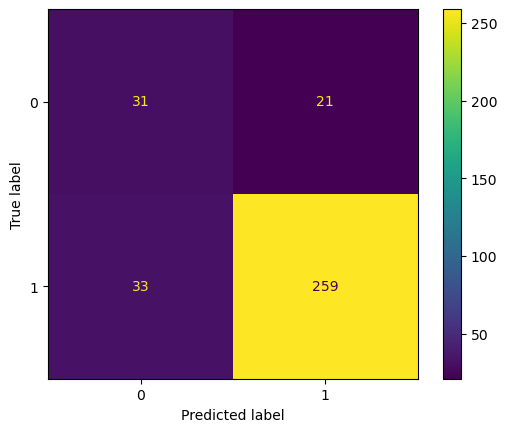

In [61]:
cm = confusion_matrix(y_pred_gs ,y_test, labels=grid_search_lr.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=grid_search_lr.classes_)

disp.plot()

plt.show()

we didn’t gain any substantial benefit in building a better model while tuning the hyperparameters, and the Logistic Regression classifier with default parameters was strong enough by itself.